In [1]:
# 45/46
# Consideriamo i dati in tabella. Formuliamo degli appropriati modelli di regressione.

import numpy as np
tabella = np.array([[0.32, 1.60],
                    [2.83, 5.30],
                    [3.94, 11.88],
                    [6.52, 15.28],
                    [7.51, 18.19],
                    [11.43, 32.55],
                    [0.96, 1.23,],
                    [3.32, 0.32],
                    [4.62, 8.03],
                    [6.65, 16.47],
                    [8.96, 16.25],
                    [11.45, 37.3],
                    [0.96, 0.48],
                    [3.80, 0.06],
                    [5.91, 9.91],
                    [6.83, 14.96],
                    [9.56, 21.82],
                    [12.02, 33.19]])

b0 = -4.391330475499407 b1 = 3.0101677531275155
b[0] = -4.391330475499409 b1 = 3.010167753127515


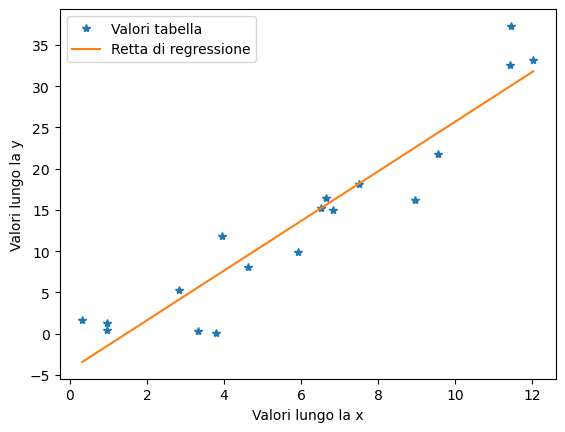

R² = 0.8905996203945866
L'ipotesi nulla può essere rigettata


In [2]:
x = tabella[:, 0]
y = tabella[:, 1]
n = int (tabella.size /2)
# print (n)

x_mean = np.mean(x)
y_mean = np.mean(y)

sigma_xy = (1/n) * np.sum ((x - x_mean)*(y - y_mean))
sigma_quadro_x = (1/n) * np.sum((x - x_mean)**2)

b1 = sigma_xy / sigma_quadro_x
b0 = y_mean - (b1 * x_mean)

# Costruisco X

X = np.zeros((n, 2))
X [:, 0] = 1
X [:, 1] = x
# print (X)

XX = np.linalg.pinv(X)
b = np.dot(XX, y)
y_hat = np.dot(X,b)

print ("b0 =", b0, "b1 =", b1)
print ("b[0] =", b[0], "b1 =", b[1])

import matplotlib.pyplot as plt
x_graph = np.linspace (min(x), max(x), 1000)
y_graph = b0 + b1 * x_graph

plt.plot (x, y, "*", label = "Valori tabella")
plt.plot (x_graph, y_graph, label = "Retta di regressione")
plt.xlabel ("Valori lungo la x")
plt.ylabel ("Valori lungo la y")
plt.legend()
plt.show()


R_quadro = np.sum((y_hat - y_mean)**2) / np.sum((y - y_mean)**2)
print ("R² =", R_quadro)

# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

M = np.linalg.inv(np.dot(X.T,X))
m = M[1][1]
r = y - y_hat
s_quadro = np.sum((r**2)/(n-2))
T1 = b[1] / (np.sqrt(s_quadro * m))

from scipy.stats import t
alpha = 0.05
tt = t.ppf (1- alpha/2, n-2)

if T1 > tt:
    print ("L'ipotesi nulla può essere rigettata")
else:
    print ("L'ipotesi nulla non può essere rigettata")